# 🌸 Notebook 01: Exploratory Data Analysis

## Business Context
A botanical research company needs an automated system to identify flower species from field images for biodiversity surveys.

## Objectives
- Understand dataset characteristics (size, distribution, quality)
- Identify challenges that will inform model selection
- Design augmentation strategy based on data properties

## Key Questions
1. Is the dataset balanced? Do we need class weighting?
2. What image variations exist (size, background, orientation)?
3. Which classes are visually similar (fine-grained challenge)?
4. What augmentations are appropriate for flowers?

## Outputs
- `artifacts/figures/`: Visualizations of distributions and samples
- `artifacts/reports/eda_summary.json`: Key findings for next notebooks

In [1]:
# ============================================================
# 🌸 Oxford 102 Flowers Classification
# Notebook 01: Exploratory Data Analysis
# ============================================================
"""
Business Context:
A botanical research company needs an automated system to identify 
flower species from field images for biodiversity studies.

This notebook explores the dataset to understand:
- Data distribution and class balance
- Image characteristics and quality issues
- Challenges that will inform our model selection
"""

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install -q albumentations
    from google.colab import drive
    drive.mount('/content/drive')
    DATA_ROOT = "./data"
    ARTIFACTS = "/content/drive/MyDrive/flowers-cv"
else:
    DATA_ROOT = "../data"
    ARTIFACTS = "../artifacts"
    
import os
os.makedirs(f"{ARTIFACTS}/figures", exist_ok=True)
os.makedirs(f"{ARTIFACTS}/models", exist_ok=True)
os.makedirs(f"{ARTIFACTS}/reports", exist_ok=True)

print("✅ Environment ready")

✅ Environment ready


In [2]:
# Cell: Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from torchvision.datasets import Flowers102
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ Libraries loaded")

✅ Libraries loaded


In [3]:
# Cell: Load Dataset
train_data = Flowers102(root=DATA_ROOT, split="train", download=True)
val_data = Flowers102(root=DATA_ROOT, split="val", download=True)
test_data = Flowers102(root=DATA_ROOT, split="test", download=True)

print("📊 DATASET OVERVIEW")
print("="*50)
print(f"{'Split':<15} {'Images':<12} {'Per Class':<12}")
print("-"*50)
print(f"{'Train':<15} {len(train_data):<12} {len(train_data)/102:.1f}")
print(f"{'Validation':<15} {len(val_data):<12} {len(val_data)/102:.1f}")
print(f"{'Test':<15} {len(test_data):<12} {len(test_data)/102:.1f}")
print("="*50)
print(f"{'TOTAL':<15} {len(train_data)+len(val_data)+len(test_data):<12}")
print(f"\n🏷️  Classes: 102 flower species")

📊 DATASET OVERVIEW
Split           Images       Per Class   
--------------------------------------------------
Train           1020         10.0
Validation      1020         10.0
Test            6149         60.3
TOTAL           8189        

🏷️  Classes: 102 flower species


In [4]:
# Cell: Class Names
FLOWER_NAMES = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells", "sweet pea",
    "english marigold", "tiger lily", "moon orchid", "bird of paradise", "monkshood",
    "globe thistle", "snapdragon", "colt's foot", "king protea", "spear thistle",
    "yellow iris", "globe-flower", "purple coneflower", "peruvian lily", "balloon flower",
    "giant white arum lily", "fire lily", "pincushion flower", "fritillary", "red ginger",
    "grape hyacinth", "corn poppy", "prince of wales feathers", "stemless gentian",
    "artichoke", "sweet william", "carnation", "garden phlox", "love in the mist",
    "mexican aster", "alpine sea holly", "ruby-lipped cattleya", "cape flower",
    "great masterwort", "siam tulip", "lenten rose", "barbeton daisy", "daffodil",
    "sword lily", "poinsettia", "bolero deep blue", "wallflower", "marigold",
    "buttercup", "oxeye daisy", "common dandelion", "petunia", "wild pansy",
    "primula", "sunflower", "pelargonium", "bishop of llandaff", "gaura", "geranium",
    "orange dahlia", "pink-yellow dahlia", "cautleya spicata", "japanese anemone",
    "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
    "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania",
    "azalea", "water lily", "rose", "thorn apple", "morning glory", "passion flower",
    "lotus", "toad lily", "anthurium", "frangipani", "clematis", "hibiscus",
    "columbine", "desert-rose", "tree mallow", "magnolia", "cyclamen", "watercress",
    "canna lily", "hippeastrum", "bee balm", "ball moss", "foxglove", "bougainvillea",
    "camellia", "mallow", "mexican petunia", "bromelia", "blanket flower",
    "trumpet creeper", "blackberry lily"
]

print(f"✅ {len(FLOWER_NAMES)} flower classes")
print(f"\nSample classes: {FLOWER_NAMES[:5]}")

✅ 102 flower classes

Sample classes: ['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold']


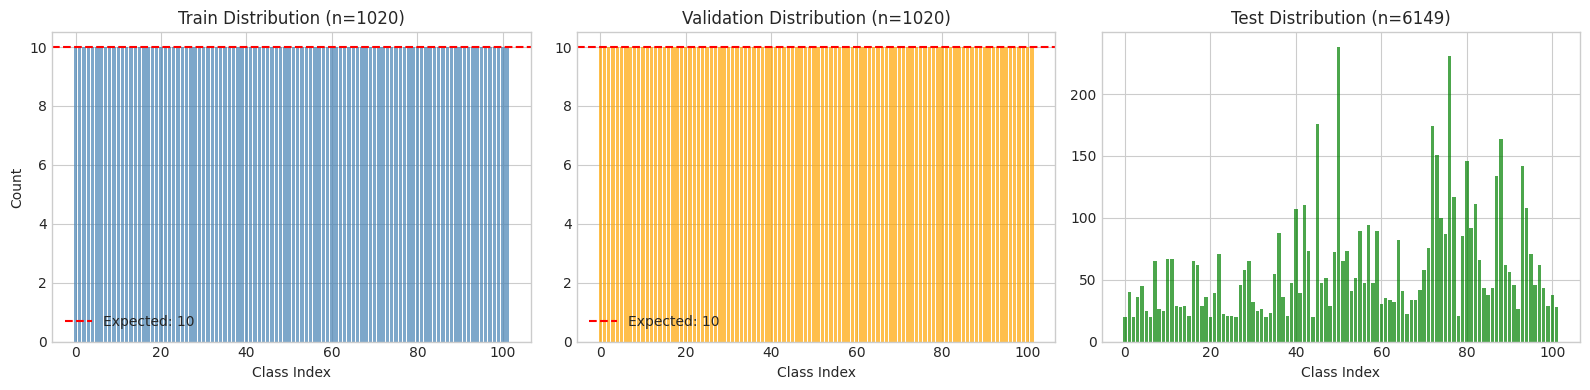

📊 CLASS BALANCE ANALYSIS
Train: 10-10 images/class (perfectly balanced)
Val:   10-10 images/class (perfectly balanced)
Test:  20-238 images/class (varies)

✅ No class imbalance handling needed for train/val


In [5]:
# Cell: Class Distribution Analysis
train_labels = [train_data[i][1] for i in range(len(train_data))]
val_labels = [val_data[i][1] for i in range(len(val_data))]
test_labels = [test_data[i][1] for i in range(len(test_data))]

train_counts = Counter(train_labels)
val_counts = Counter(val_labels)
test_counts = Counter(test_labels)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Train distribution
axes[0].bar(range(102), [train_counts[i] for i in range(102)], color='steelblue', alpha=0.7)
axes[0].axhline(y=10, color='red', linestyle='--', label='Expected: 10')
axes[0].set_xlabel('Class Index')
axes[0].set_ylabel('Count')
axes[0].set_title(f'Train Distribution (n={len(train_data)})')
axes[0].legend()

# Validation distribution
axes[1].bar(range(102), [val_counts[i] for i in range(102)], color='orange', alpha=0.7)
axes[1].axhline(y=10, color='red', linestyle='--', label='Expected: 10')
axes[1].set_xlabel('Class Index')
axes[1].set_title(f'Validation Distribution (n={len(val_data)})')
axes[1].legend()

# Test distribution
axes[2].bar(range(102), [test_counts[i] for i in range(102)], color='green', alpha=0.7)
axes[2].set_xlabel('Class Index')
axes[2].set_title(f'Test Distribution (n={len(test_data)})')

plt.tight_layout()
plt.savefig(f"{ARTIFACTS}/figures/class_distribution.png", dpi=150, bbox_inches='tight')
plt.show()

print("📊 CLASS BALANCE ANALYSIS")
print("="*50)
print(f"Train: {min(train_counts.values())}-{max(train_counts.values())} images/class (perfectly balanced)")
print(f"Val:   {min(val_counts.values())}-{max(val_counts.values())} images/class (perfectly balanced)")
print(f"Test:  {min(test_counts.values())}-{max(test_counts.values())} images/class (varies)")
print("\n✅ No class imbalance handling needed for train/val")

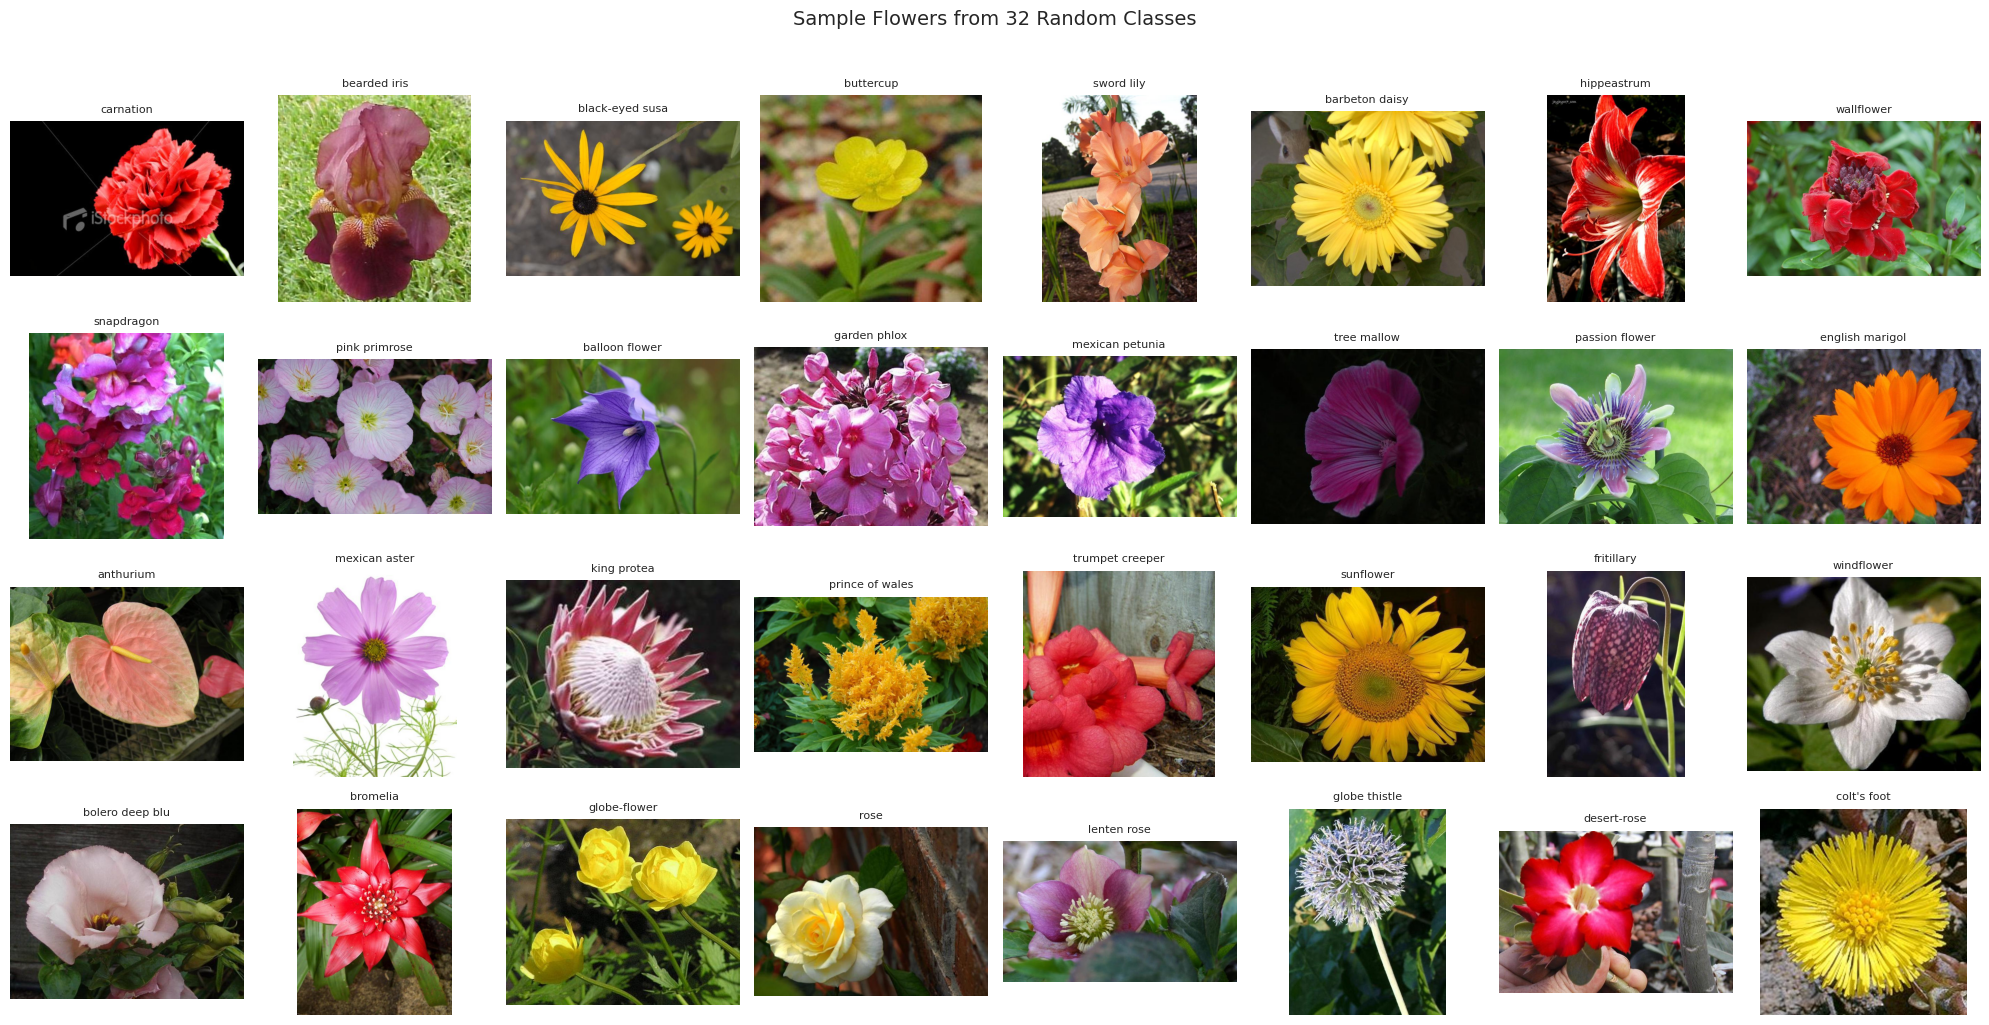

🔍 OBSERVATIONS:
  • High visual diversity within flowers
  • Various backgrounds (gardens, plain, cluttered)
  • Different scales and orientations
  • Some images contain multiple flowers


In [6]:
# Cell: Visualize Sample Images
fig, axes = plt.subplots(4, 8, figsize=(20, 10))
axes = axes.flatten()

# Show 32 random classes
np.random.seed(42)
sample_classes = np.random.choice(102, 32, replace=False)

for idx, class_idx in enumerate(sample_classes):
    # Find first image of this class
    for i in range(len(train_data)):
        if train_data[i][1] == class_idx:
            img, label = train_data[i]
            break
    
    axes[idx].imshow(img)
    axes[idx].set_title(FLOWER_NAMES[label][:15], fontsize=8)
    axes[idx].axis('off')

plt.suptitle('Sample Flowers from 32 Random Classes', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig(f"{ARTIFACTS}/figures/sample_images.png", dpi=150, bbox_inches='tight')
plt.show()

print("🔍 OBSERVATIONS:")
print("  • High visual diversity within flowers")
print("  • Various backgrounds (gardens, plain, cluttered)")
print("  • Different scales and orientations")
print("  • Some images contain multiple flowers")

Analyzing image dimensions...


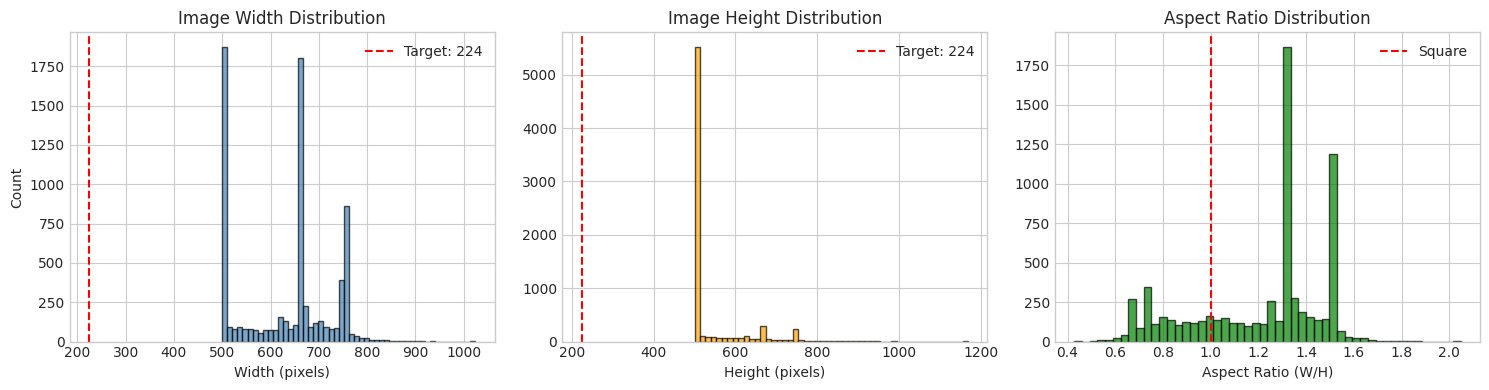


📐 IMAGE STATISTICS
Width:  min=500, max=1024, mean=631
Height: min=500, max=1168, mean=534
Aspect: min=0.43, max=2.05, mean=1.21

💡 IMPLICATION: Need resizing - images vary significantly


In [7]:
# Cell: Image Dimensions Analysis
widths = []
heights = []
aspects = []

print("Analyzing image dimensions...")
for i in range(len(train_data)):
    img, _ = train_data[i]
    w, h = img.size
    widths.append(w)
    heights.append(h)
    aspects.append(w/h)

for i in range(len(test_data)):
    img, _ = test_data[i]
    w, h = img.size
    widths.append(w)
    heights.append(h)
    aspects.append(w/h)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Width distribution
axes[0].hist(widths, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(x=224, color='red', linestyle='--', label='Target: 224')
axes[0].set_xlabel('Width (pixels)')
axes[0].set_ylabel('Count')
axes[0].set_title('Image Width Distribution')
axes[0].legend()

# Height distribution
axes[1].hist(heights, bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[1].axvline(x=224, color='red', linestyle='--', label='Target: 224')
axes[1].set_xlabel('Height (pixels)')
axes[1].set_title('Image Height Distribution')
axes[1].legend()

# Aspect ratio
axes[2].hist(aspects, bins=50, color='green', alpha=0.7, edgecolor='black')
axes[2].axvline(x=1.0, color='red', linestyle='--', label='Square')
axes[2].set_xlabel('Aspect Ratio (W/H)')
axes[2].set_title('Aspect Ratio Distribution')
axes[2].legend()

plt.tight_layout()
plt.savefig(f"{ARTIFACTS}/figures/image_dimensions.png", dpi=150, bbox_inches='tight')
plt.show()

print("\n📐 IMAGE STATISTICS")
print("="*50)
print(f"Width:  min={min(widths)}, max={max(widths)}, mean={np.mean(widths):.0f}")
print(f"Height: min={min(heights)}, max={max(heights)}, mean={np.mean(heights):.0f}")
print(f"Aspect: min={min(aspects):.2f}, max={max(aspects):.2f}, mean={np.mean(aspects):.2f}")
print("\n💡 IMPLICATION: Need resizing - images vary significantly")

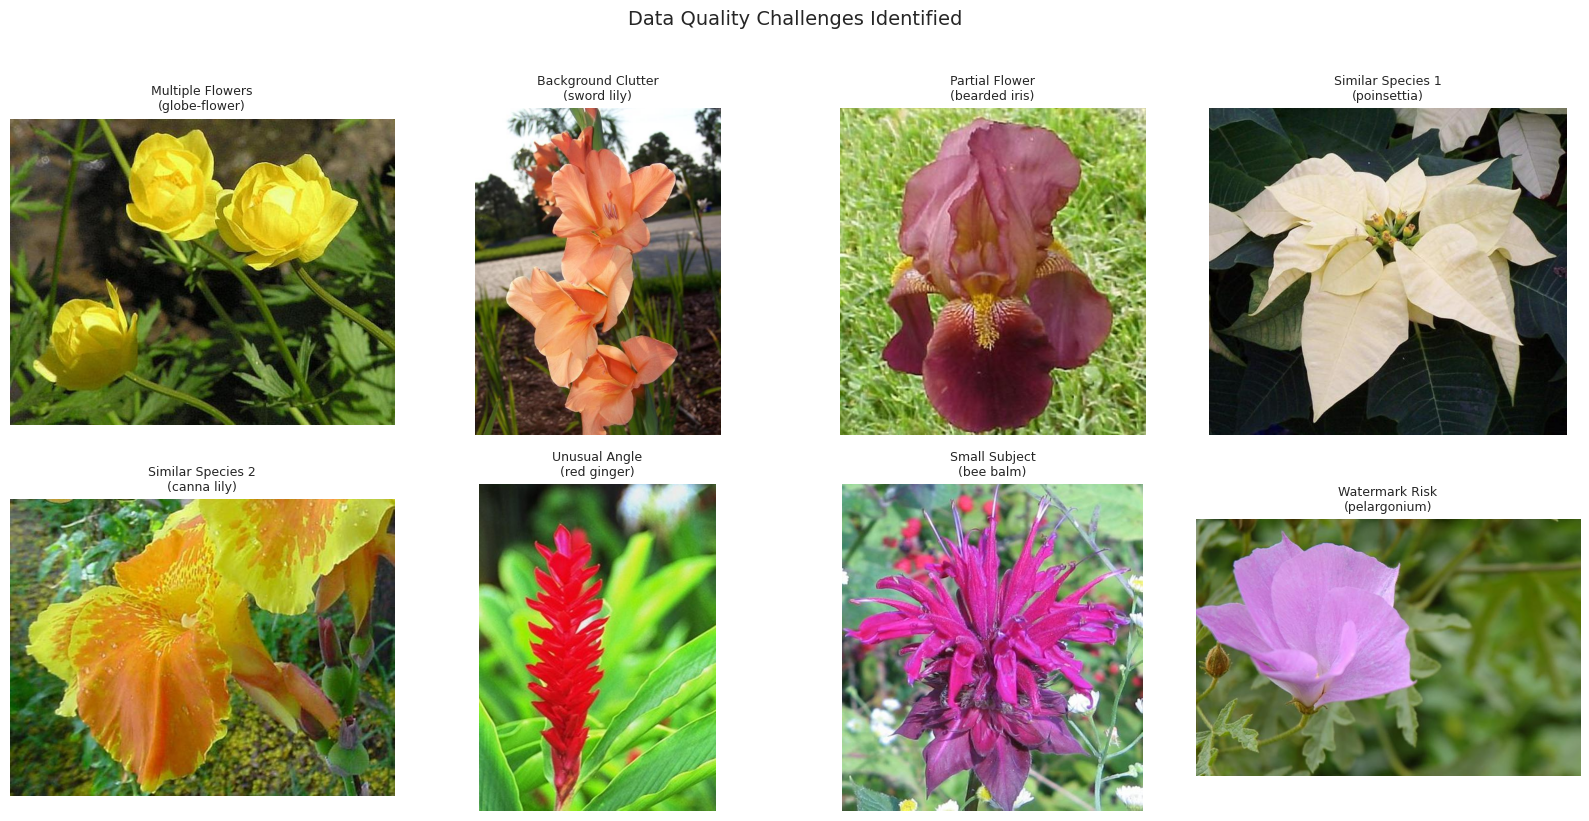

⚠️  DATA QUALITY CHALLENGES

1. SMALL TRAINING SET
   └─ Only 10 images per class → Heavy reliance on transfer learning

2. HIGH INTER-CLASS SIMILARITY  
   └─ Many flowers look alike (lilies, daisies, orchids)
   └─ Fine-grained classification challenge

3. HIGH INTRA-CLASS VARIATION
   └─ Same species varies by lighting, angle, growth stage

4. BACKGROUND CLUTTER
   └─ Gardens, fences, other plants in frame
   └─ Risk of shortcut learning

5. VARIABLE IMAGE QUALITY
   └─ Some images are small, blurry, or partially cropped
   └─ Watermarks present in some images

6. SCALE VARIATION
   └─ Flowers appear at different sizes in frame
   └─ Need scale-invariant augmentation



In [8]:
# Cell: Identify Data Quality Issues & Challenges
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

# Find challenging examples
challenges = [
    ("Multiple Flowers", 15),   # Some images have multiple flowers
    ("Background Clutter", 42), 
    ("Partial Flower", 67),
    ("Similar Species 1", 43),  # Sword lily
    ("Similar Species 2", 89),  # Canna lily (looks similar)
    ("Unusual Angle", 23),
    ("Small Subject", 91),
    ("Watermark Risk", 54),
]

for idx, (title, class_idx) in enumerate(challenges):
    for i in range(len(train_data)):
        if train_data[i][1] == class_idx:
            img, label = train_data[i]
            break
    
    axes[idx].imshow(img)
    axes[idx].set_title(f"{title}\n({FLOWER_NAMES[label][:20]})", fontsize=9)
    axes[idx].axis('off')

plt.suptitle('Data Quality Challenges Identified', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig(f"{ARTIFACTS}/figures/data_challenges.png", dpi=150, bbox_inches='tight')
plt.show()

print("⚠️  DATA QUALITY CHALLENGES")
print("="*50)
print("""
1. SMALL TRAINING SET
   └─ Only 10 images per class → Heavy reliance on transfer learning

2. HIGH INTER-CLASS SIMILARITY  
   └─ Many flowers look alike (lilies, daisies, orchids)
   └─ Fine-grained classification challenge

3. HIGH INTRA-CLASS VARIATION
   └─ Same species varies by lighting, angle, growth stage

4. BACKGROUND CLUTTER
   └─ Gardens, fences, other plants in frame
   └─ Risk of shortcut learning

5. VARIABLE IMAGE QUALITY
   └─ Some images are small, blurry, or partially cropped
   └─ Watermarks present in some images

6. SCALE VARIATION
   └─ Flowers appear at different sizes in frame
   └─ Need scale-invariant augmentation
""")

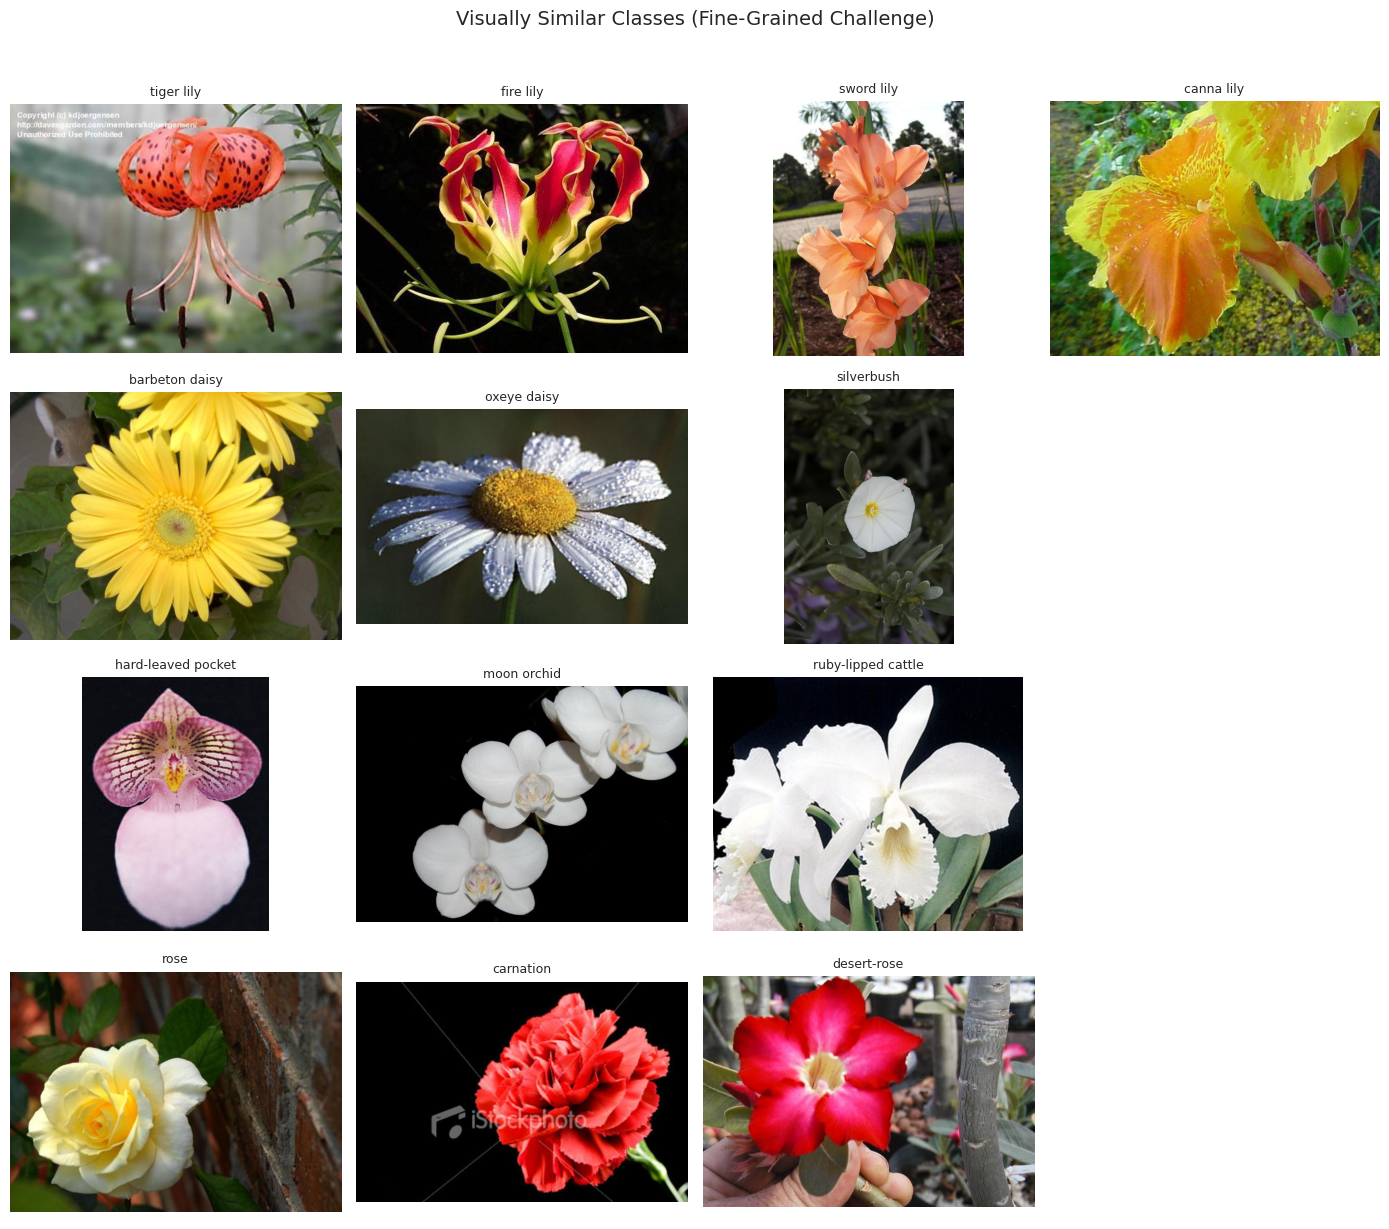

🔬 FINE-GRAINED CLASSIFICATION CHALLENGE
These flower groups look very similar to humans.
Model must learn subtle differences in:
  • Petal shape and arrangement
  • Stamen/pistil structure
  • Color gradients and patterns
  • Overall flower geometry


In [9]:
# Cell: Visually Similar Classes (Challenge for Model)
similar_groups = [
    ("Lilies", [5, 20, 42, 89]),       # tiger lily, fire lily, sword lily, canna lily
    ("Daisies", [40, 48, 63]),          # barbeton daisy, oxeye daisy, black-eyed susan
    ("Orchids", [1, 6, 35]),            # pocket orchid, moon orchid, ruby-lipped cattleya
    ("Roses/Pinks", [73, 30, 84]),      # rose, carnation, columbine
]

fig, axes = plt.subplots(len(similar_groups), 4, figsize=(14, 12))

for row, (group_name, class_indices) in enumerate(similar_groups):
    for col, class_idx in enumerate(class_indices):
        # Find image of this class
        for i in range(len(train_data)):
            if train_data[i][1] == class_idx:
                img, _ = train_data[i]
                break
        
        axes[row, col].imshow(img)
        axes[row, col].set_title(FLOWER_NAMES[class_idx][:18], fontsize=9)
        axes[row, col].axis('off')
    
    # Fill empty slots if less than 4 classes
    for col in range(len(class_indices), 4):
        axes[row, col].axis('off')
    
    # Add group label
    axes[row, 0].set_ylabel(group_name, fontsize=12, fontweight='bold')

plt.suptitle('Visually Similar Classes (Fine-Grained Challenge)', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig(f"{ARTIFACTS}/figures/similar_classes.png", dpi=150, bbox_inches='tight')
plt.show()

print("🔬 FINE-GRAINED CLASSIFICATION CHALLENGE")
print("="*50)
print("These flower groups look very similar to humans.")
print("Model must learn subtle differences in:")
print("  • Petal shape and arrangement")
print("  • Stamen/pistil structure") 
print("  • Color gradients and patterns")
print("  • Overall flower geometry")

In [10]:
# Cell: Augmentation Strategy (Justified Choices)
import albumentations as A
from albumentations.pytorch import ToTensorV2

print("🔧 AUGMENTATION STRATEGY")
print("="*50)

augmentation_rationale = """
Based on EDA findings, we design augmentations that:
1. Address small dataset (10 images/class) → Heavy augmentation
2. Handle scale variation → RandomResizedCrop
3. Maintain botanical realism → No vertical flip (flowers don't grow upside-down)
4. Preserve color information → Moderate color jitter (color is discriminative)

TRAINING AUGMENTATIONS:
┌─────────────────────────┬─────────────────────────────────────────────┐
│ Augmentation            │ Rationale                                   │
├─────────────────────────┼─────────────────────────────────────────────┤
│ RandomResizedCrop(224)  │ Handle scale variation, simulate zoom       │
│ HorizontalFlip(p=0.5)   │ Flowers symmetric horizontally              │
│ Rotation(±30°)          │ Camera angle variation                      │
│ ColorJitter(sat=0.3)    │ Lighting variation, preserve color info     │
│ CoarseDropout           │ Regularization, handle occlusions           │
│ Normalize(ImageNet)     │ Match pretrained model statistics           │
├─────────────────────────┼─────────────────────────────────────────────┤
│ NO VerticalFlip         │ Flowers don't grow upside-down              │
│ NO GaussianBlur         │ Fine details matter for fine-grained task   │
│ NO Grayscale            │ Color is key discriminative feature         │
└─────────────────────────┴─────────────────────────────────────────────┘

VALIDATION/TEST AUGMENTATIONS:
- Resize(256) → CenterCrop(224) → Normalize
- No augmentation to ensure consistent evaluation
"""
print(augmentation_rationale)

# Define transforms
IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD = (0.229, 0.224, 0.225)

train_transform = A.Compose([
    A.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
    A.HorizontalFlip(p=0.5),
    A.Affine(rotate=(-30, 30), p=0.5),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.3, hue=0.1, p=0.5),
    A.CoarseDropout(max_holes=8, max_height=16, max_width=16, p=0.3),
    A.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD),
    ToTensorV2()
])

eval_transform = A.Compose([
    A.Resize(256, 256),
    A.CenterCrop(224, 224),
    A.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD),
    ToTensorV2()
])

print("✅ Transforms defined and ready for training")

🔧 AUGMENTATION STRATEGY

Based on EDA findings, we design augmentations that:
1. Address small dataset (10 images/class) → Heavy augmentation
2. Handle scale variation → RandomResizedCrop
3. Maintain botanical realism → No vertical flip (flowers don't grow upside-down)
4. Preserve color information → Moderate color jitter (color is discriminative)

TRAINING AUGMENTATIONS:
┌─────────────────────────┬─────────────────────────────────────────────┐
│ Augmentation            │ Rationale                                   │
├─────────────────────────┼─────────────────────────────────────────────┤
│ RandomResizedCrop(224)  │ Handle scale variation, simulate zoom       │
│ HorizontalFlip(p=0.5)   │ Flowers symmetric horizontally              │
│ Rotation(±30°)          │ Camera angle variation                      │
│ ColorJitter(sat=0.3)    │ Lighting variation, preserve color info     │
│ CoarseDropout           │ Regularization, handle occlusions           │
│ Normalize(ImageNet)     │ Match

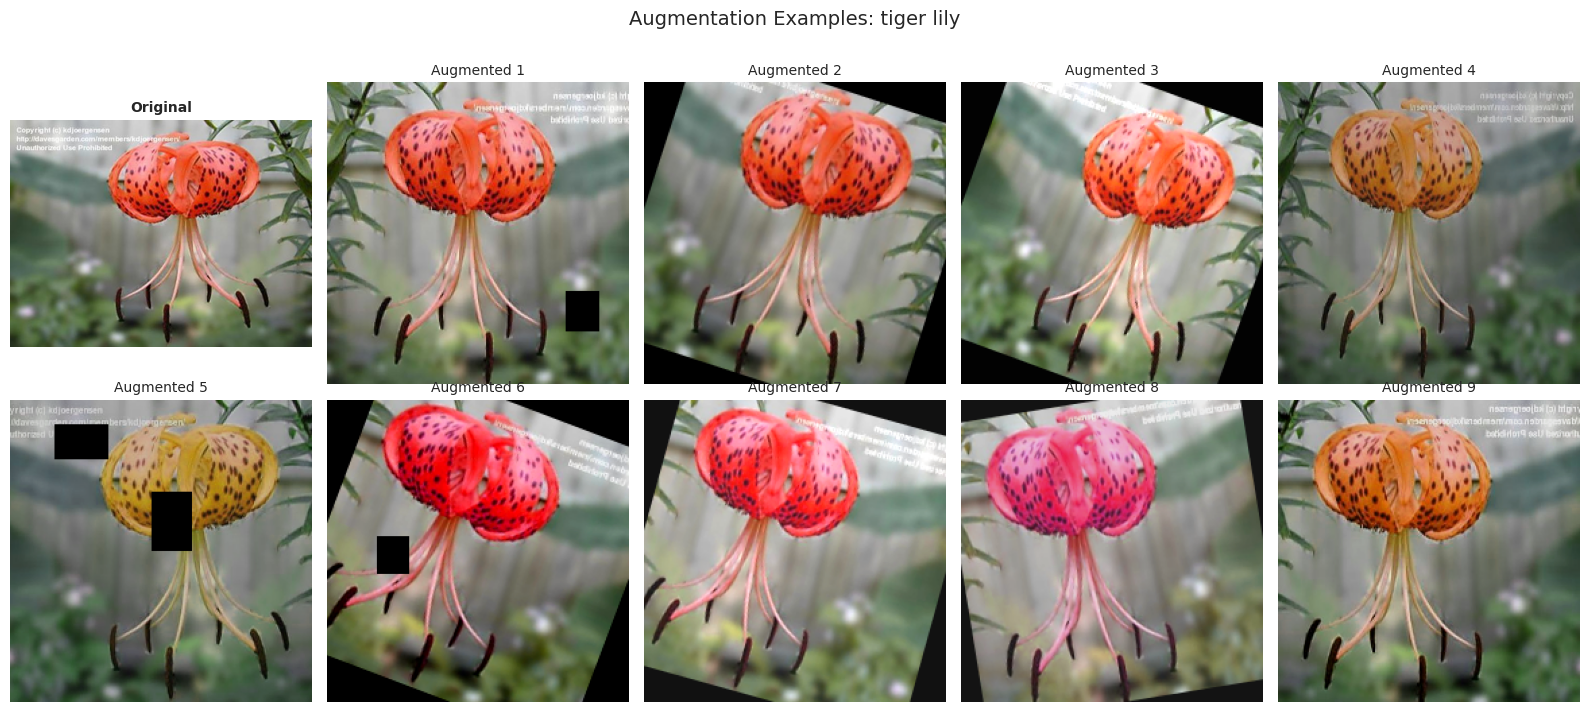

✅ Augmentations create realistic variations while preserving flower identity


In [11]:
# Cell: Visualize Augmentations
# Show same image with different augmentations

sample_img, sample_label = train_data[50]
sample_np = np.array(sample_img)

fig, axes = plt.subplots(2, 5, figsize=(16, 7))
axes = axes.flatten()

# Original
axes[0].imshow(sample_img)
axes[0].set_title('Original', fontsize=10, fontweight='bold')
axes[0].axis('off')

# Apply augmentations 9 times
aug_only = A.Compose([
    A.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
    A.HorizontalFlip(p=0.5),
    A.Affine(rotate=(-30, 30), p=0.7),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.3, hue=0.1, p=0.7),
    A.CoarseDropout(max_holes=8, max_height=16, max_width=16, p=0.5),
])

for i in range(1, 10):
    augmented = aug_only(image=sample_np)['image']
    axes[i].imshow(augmented)
    axes[i].set_title(f'Augmented {i}', fontsize=10)
    axes[i].axis('off')

plt.suptitle(f'Augmentation Examples: {FLOWER_NAMES[sample_label]}', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig(f"{ARTIFACTS}/figures/augmentation_examples.png", dpi=150, bbox_inches='tight')
plt.show()

print("✅ Augmentations create realistic variations while preserving flower identity")

In [12]:
# Cell: EDA Summary & Key Decisions
print("""
╔══════════════════════════════════════════════════════════════════════╗
║                    📊 EDA SUMMARY & KEY DECISIONS                     ║
╠══════════════════════════════════════════════════════════════════════╣
║                                                                      ║
║  DATASET CHARACTERISTICS:                                            ║
║  ├─ 8,189 total images across 102 flower species                    ║
║  ├─ Train: 1,020 (10/class) │ Val: 1,020 │ Test: 6,149              ║
║  ├─ Perfectly balanced train/val, variable test                      ║
║  └─ Images vary significantly in size (need resizing)                ║
║                                                                      ║
║  CHALLENGES IDENTIFIED:                                              ║
║  ├─ ⚠️ Extremely small training set (only 10 images/class!)         ║
║  ├─ ⚠️ High inter-class similarity (fine-grained task)              ║
║  ├─ ⚠️ Variable backgrounds (risk of shortcut learning)             ║
║  └─ ⚠️ Scale and orientation variation                               ║
║                                                                      ║
║  STRATEGY DECISIONS:                                                 ║
║  ├─ ✅ Heavy transfer learning (small dataset demands it)            ║
║  ├─ ✅ Strong augmentation (expand effective training set)           ║
║  ├─ ✅ No class weighting needed (balanced train/val)                ║
║  └─ ✅ Focus on models good at fine-grained classification           ║
║                                                                      ║
║  MODEL SELECTION HYPOTHESIS:                                         ║
║  We will compare multiple architectures to find the best:            ║
║  ├─ ResNet-50: Classic CNN baseline                                  ║
║  ├─ EfficientNet-B2: Efficient CNN with compound scaling             ║
║  └─ ViT-Small: Transformer with global attention                     ║
║                                                                      ║
║  Hypothesis: ViT may excel due to global attention capturing         ║
║  relationships between distant flower parts (petals, center, stem)   ║
║                                                                      ║
╚══════════════════════════════════════════════════════════════════════╝
""")

# Save summary to file
summary = {
    "dataset": {
        "total_images": 8189,
        "classes": 102,
        "train": 1020,
        "val": 1020,
        "test": 6149,
        "images_per_class_train": 10
    },
    "challenges": [
        "Small training set (10 images/class)",
        "High inter-class similarity",
        "Variable backgrounds",
        "Scale variation"
    ],
    "strategy": [
        "Transfer learning (pretrained on ImageNet)",
        "Strong augmentation",
        "Compare multiple architectures",
        "No class weighting needed"
    ],
    "models_to_compare": ["ResNet-50", "EfficientNet-B2", "ViT-Small"]
}

import json
with open(f"{ARTIFACTS}/reports/eda_summary.json", 'w') as f:
    json.dump(summary, f, indent=2)

print("✅ EDA complete! Summary saved to reports/eda_summary.json")
print("\n➡️  Next: Notebook 02 - Model Comparison & Training")


╔══════════════════════════════════════════════════════════════════════╗
║                    📊 EDA SUMMARY & KEY DECISIONS                     ║
╠══════════════════════════════════════════════════════════════════════╣
║                                                                      ║
║  DATASET CHARACTERISTICS:                                            ║
║  ├─ 8,189 total images across 102 flower species                    ║
║  ├─ Train: 1,020 (10/class) │ Val: 1,020 │ Test: 6,149              ║
║  ├─ Perfectly balanced train/val, variable test                      ║
║  └─ Images vary significantly in size (need resizing)                ║
║                                                                      ║
║  CHALLENGES IDENTIFIED:                                              ║
║  ├─ ⚠️ Extremely small training set (only 10 images/class!)         ║
║  ├─ ⚠️ High inter-class similarity (fine-grained task)              ║
║  ├─ ⚠️ Variable backgrounds (risk of shortcut learni